In [ ]:
!wget https://www.dropbox.com/s/j14emw0w9v4yq7x/dataset.zip

--2021-09-01 02:49:46--  https://www.dropbox.com/s/j14emw0w9v4yq7x/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/j14emw0w9v4yq7x/dataset.zip [following]
--2021-09-01 02:49:46--  https://www.dropbox.com/s/raw/j14emw0w9v4yq7x/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2021-09-01 02:49:46 ERROR 404: Not Found.



In [ ]:
!unzip dataset.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pathlib




import random 

import tensorflow as tf


from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [ ]:
path = pathlib.Path('dataset_licence_plate')
path_list = sorted(path.glob('*.png'))
label_path = list(path.glob('*.csv'))[0]
SIZE = 300

In [ ]:
def plot_images( images_list ,label):
    import math
    num_cols = 3
    num_rows = math.ceil( len(images_list) / num_cols )
    figsize = (12,12)
    fig = plt.figure( figsize=figsize)


  
    for i in range(0, len(images_list) ):
     
        img = images_list[i].copy()
        w,h = label[i][2],label[i][3]
        x1 = int(label[i][0])
        y1 = int(label[i][1])

        x2 = int(x1+w)
        y2 = int(y1+h)
      
        img = cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),1)
        axi = fig.add_subplot(num_rows, num_cols, i+1)
        axi.axis( 'off' )
        # axi.set_title( ("%.1f" % info[2] ) )
        axi.imshow( img )

In [ ]:
data_y = np.genfromtxt(str(label_path),delimiter=',',dtype=np.uint32)
data_y = data_y*SIZE//500
data_y = data_y/SIZE

In [ ]:
print(data_y[0])

[0.32333333 0.61333333 0.31       0.08      ]


In [ ]:
data_x = []
for img_path in path_list[:]:
  img = cv2.imread(str(img_path))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(SIZE,SIZE))
  img = img/255.0
  data_x.append(img)

  


In [ ]:
data_x[0].dtype

dtype('float64')

In [ ]:
x = np.asarray(data_x)
y = np.asarray(data_y[:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


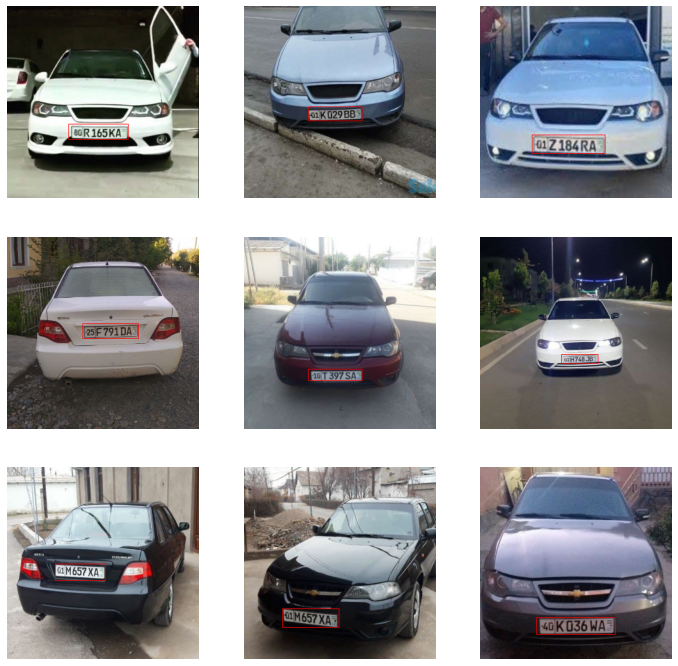

In [ ]:
plot_images(data_x[:9],data_y[:9]*SIZE)

In [ ]:
seed = 7
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size ) 

In [ ]:
# create model

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 3)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dense(4096,activation='relu'))


model.add(layers.Dense(1024))
model.add(layers.Dense(512))
model.add(layers.Dense(64))

model.add(layers.Dense(4))
# Compile model
# Define the optimizer

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 64)      1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 296, 296, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 146, 146, 128)     73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 144, 144, 128)     147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 72, 72, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 70, 70, 256)      

In [ ]:
history = model.fit(
 x_train, y_train,
 validation_data=(x_test,y_test),
  # validation_split = 0.2,
  epochs=15,
  # verbose=0,
 )

Epoch 1/15
26/26 [==============================] - 55s 1s/step - loss: 545480671232.0000 - mae: 131914.3750 - mse: 545480671232.0000 - val_loss: 0.0096 - val_mae: 0.0693 - val_mse: 0.0096
Epoch 2/15
26/26 [==============================] - 22s 829ms/step - loss: 0.0216 - mae: 0.1016 - mse: 0.0216 - val_loss: 0.0097 - val_mae: 0.0726 - val_mse: 0.0097
Epoch 3/15
26/26 [==============================] - 22s 849ms/step - loss: 0.2869 - mae: 0.2644 - mse: 0.2869 - val_loss: 0.0157 - val_mae: 0.0972 - val_mse: 0.0157
Epoch 4/15
26/26 [==============================] - 22s 859ms/step - loss: 0.0282 - mae: 0.1139 - mse: 0.0282 - val_loss: 0.0147 - val_mae: 0.0896 - val_mse: 0.0147
Epoch 5/15
26/26 [==============================] - 22s 834ms/step - loss: 0.3348 - mae: 0.2833 - mse: 0.3348 - val_loss: 0.0101 - val_mae: 0.0696 - val_mse: 0.0101
Epoch 6/15
26/26 [==============================] - 22s 851ms/step - loss: 0.0120 - mae: 0.0770 - mse: 0.0120 - val_loss: 0.0109 - val_mae: 0.0745 - va

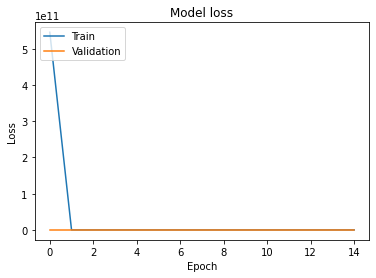

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(y_test.shape)

(205, 4)


In [ ]:
idx = 0
y_hat = model.predict(x_test[idx:idx+10])

In [ ]:
print(y_hat*SIZE)

[[171.88919  329.48135  152.49637   53.7398  ]
 [172.01     329.7205   152.59206   53.83438 ]
 [171.98225  329.6619   152.56976   53.805847]
 [171.80914  329.32053  152.43121   53.677597]
 [171.93628  329.57077  152.53278   53.772514]
 [171.92871  329.55576  152.52751   53.764   ]
 [171.912    329.52304  152.51358   53.75428 ]
 [172.00705  329.7115   152.58923   53.82739 ]
 [172.00845  329.71613  152.59178   53.82667 ]
 [171.89362  329.48773  152.49925   53.740208]]


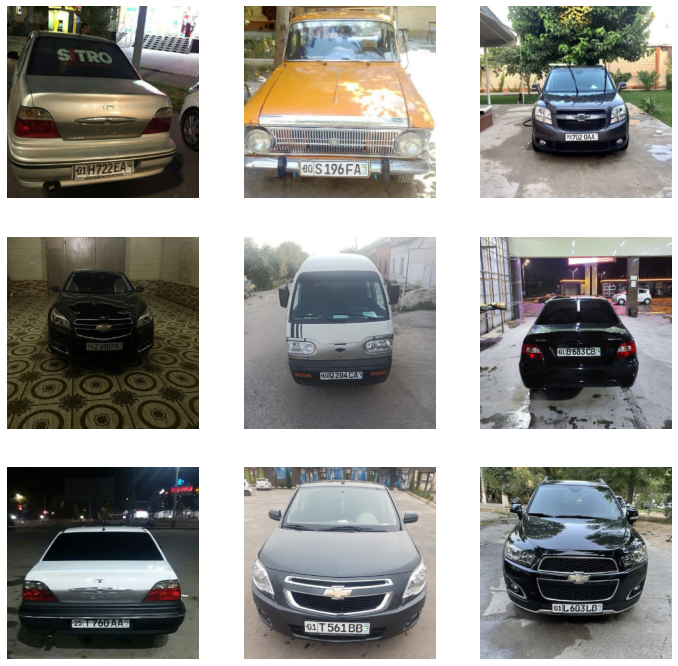

In [ ]:
plot_images(x_test[idx:idx+9],y_hat[:9]*SIZE)